## Multiple Linear Regression
Multiple Linear regression has a dependent feature(target feature) and more than 1 indepdendent features

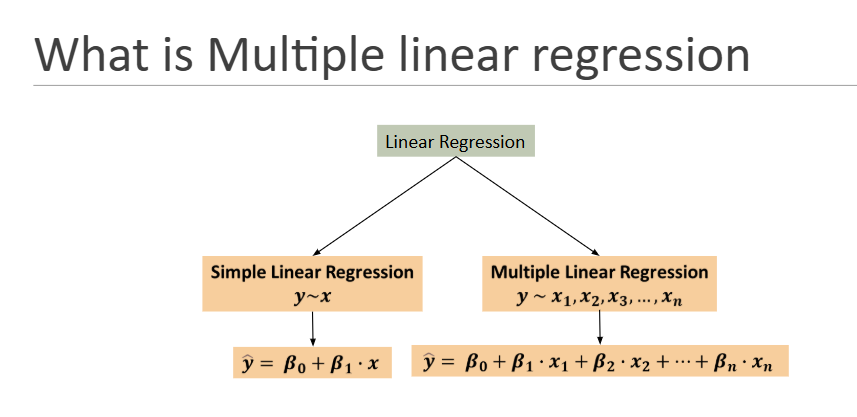

## Coefficients B0,B1,B2,...Bn needs to calculated in such a way that the model results in least squared model


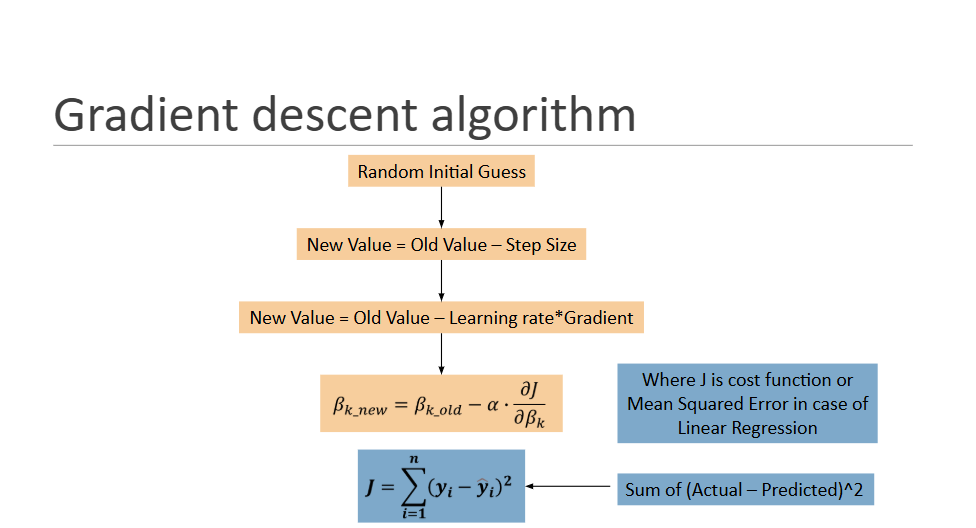

Loss function:
when you are trying the error/residual difference for a single datapoint
error/residual : yactual - ypredicted

Cost function:
when you are trying the error/residual difference for all the datapoints
error/residual : Summation(yactual - ypredicted)^2

## Gradient Descent Algorithm
1.Initialzing the coefficients randomly.

2.Caluclate the Squared errors. Determine the cost function

3.Calculate the derivate of cost function and multiply it with a learning 
rate. Learning rates are preferred between 0.001 - 0.1

4.calculate the new coefficients

5.calculate the cost function, choose the optimised coefficients resulting in least squared model. Look for global minima point where least error is achieved with corresponding optimised coefficients

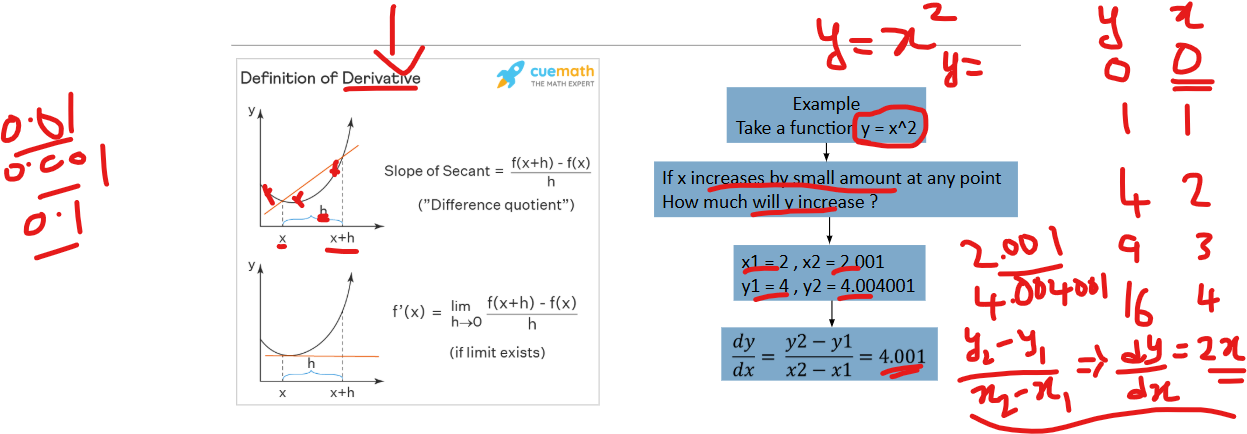

# Read the dataset

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/50_Startups.csv"
)
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.shape

(50, 5)

In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# There are no missing values nor any duplicated rows in this dataset

## Separate X and Y features
Y => PROFIT
X => ADMIN,RND

In [8]:
x = df[["ADMIN","RND"]]
y= df [["PROFIT"]]

In [9]:
x.head()

,ADMIN,RND
0,136897.80,165349.20
1,151377.59,162597.70
2,101145.55,153441.51
3,118671.85,144372.41
4,91391.77,142107.34


In [10]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Model Building

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model= LinearRegression()
model.fit(x,y)

LinearRegression()

## Evaluate the model

In [13]:
model.score(x,y)

0.9478129385009173

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
def evaluate_model(model,x,y):
    ypred = model.predict(x)
    MSE = mean_squared_error(y,ypred)
    MAE= mean_absolute_error(y,ypred)
    R2 = r2_score(y,ypred)
    RMSE = MSE**(1/2)

    print(f"MSE: {MSE}")
    print(f"MAE: {MAE}")
    print(f"RMSE: {RMSE}")
    print(f"R2 score: {R2}")

In [16]:
evaluate_model(model,x,y)

MSE: 83086833.25816332
MAE: 6691.397424314962
RMSE: 9115.197927536368
R2 score: 0.9478129385009173


# The above model can be considered for final predictions as the r2 score is greater than 0.8

In [17]:
model.intercept_

array([54886.62062756])

In [18]:
model.coef_

array([[-0.05299543,  0.86211798]])

## Profit_predicted = B0 + B1ADMIN +B2RND => below are the optimised values of coefficients
PROFIT_PREDICTED = 54886.62062756 + (-0.05299543)*ADMIN + (0.86211798)*RND
IF ADMIN and RND is 0, then profit_predicted = 54886.62062756

In [19]:
sample=[160000,19000]

In [20]:
model.predict([sample])

c:\ML 9\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[62787.59310165]])